<a href="https://drive.google.com/file/d/1b7tSyJBpWggHEBGdWa80JdKh7VNq2FEf/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1
Implement serial test and apply to a `samples`

In [58]:
import numpy as np
import random
from scipy.stats import chisquare

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

samples = [rng() for _ in range(1000)]

# Your code here
def serial_test(sample, grid=10):
  n = len(sample)
  points = np.array(sample).reshape(-1, 2)
  f_obs = np.histogram2d(points[:,0], points[:,1], bins = (grid, grid))[0]
  f_exp = np.full((grid, grid), len(points) // (grid**2))

  statistic, pvalue = chisquare(f_obs.flatten(), f_exp.flatten())

  return statistic, pvalue

print(serial_test(samples))


(100.39999999999999, 0.4418131550464517)


### Problem 2*
Implement permutation test and apply to a `samples`

In [4]:
# Your code here

from itertools import permutations
from math import factorial

def count_orders(sample, d):
    n = len(sample) // d
    order_counts = {}

    for i in range(n):
        block = sample[i * d : (i + 1) * d]
        sorted_indices = tuple(np.argsort(block))
        if sorted_indices in order_counts:
            order_counts[sorted_indices] += 1
        else:
            order_counts[sorted_indices] = 1

    return order_counts

def order_test(sample, d):
    order_counts = count_orders(sample, d)

    n = len(sample) // d
    expected = n / factorial(d)

    all_orders = list(permutations(range(d)))
    f_obs = np.array([order_counts.get(order, 0) for order in all_orders])
    f_exp = np.full(len(all_orders), expected)

    statistic, pvalue = chisquare(f_obs, f_exp)

    return statistic, pvalue

n = 10
d = 3
rng.current = 1
samples = [rng() for _ in range(n*d)]
order_test(samples, d)

(2.0000000000000004, 0.8491450360846096)

The choice of parameters $m$, $a$ and $c$ has a significant impact on the quality of the sequence. If the parameters are chosen unsuccessfully, it can lead to unexpected consequences:

### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [5]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1
samples_bad = [rng_bad() for _ in range(1000)]
# Your code here

rng.current = 1
samples_good = [rng() for _ in range(1000)]

print(serial_test(samples_good))
print(serial_test(samples_bad))


(100.39999999999999, 0.4418131550464517)
(124.00000000000001, 0.04528705215148476)


Видим, что в "плохом" случае p_value$< 0.05$, то есть у второй выборки действительно есть проблемы.

### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

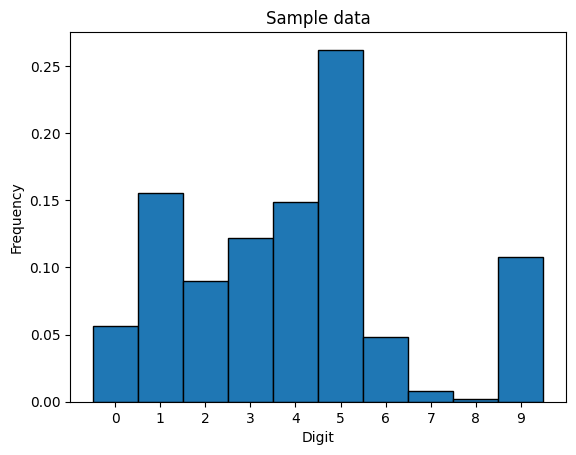

In [41]:
# Your code here
import matplotlib.pyplot as plt
import bisect

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

weights = weights / weights.sum()

indices = np.argsort(weights)[::-1]
sorted_weights = [weights[i] for i in indices]
sorted_digits = [digits[i] for i in indices]

cdf = np.cumsum(weights)

n = 1000
samples = []
for _ in range(n):
    u = np.random.rand()
    i = bisect.bisect_left(cdf, u)
    samples.append(digits[i])

plt.hist(samples, bins=np.arange(11) - 0.5, edgecolor='black', density=True)
plt.xticks(range(10))
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Sample data')
plt.show()

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

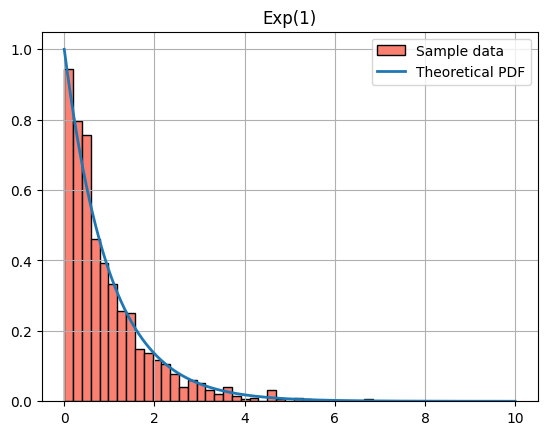

In [114]:
# Your code here
lambda_ = 1
n = 1000
y = np.random.rand(n)
x = -np.log(1 - y) / lambda_

x_theory = np.linspace(0, 10, 1000)
y_theory = lambda_ * np.exp(-lambda_*x_theory)


plt.hist(x, bins=35, density=True, edgecolor = 'black', color = 'salmon', label='Sample data')
plt.plot(x_theory, y_theory, lw=2, label='Theoretical PDF')
plt.title(f'Exp({lambda_})')
plt.legend()
plt.grid(True)
plt.show()


### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

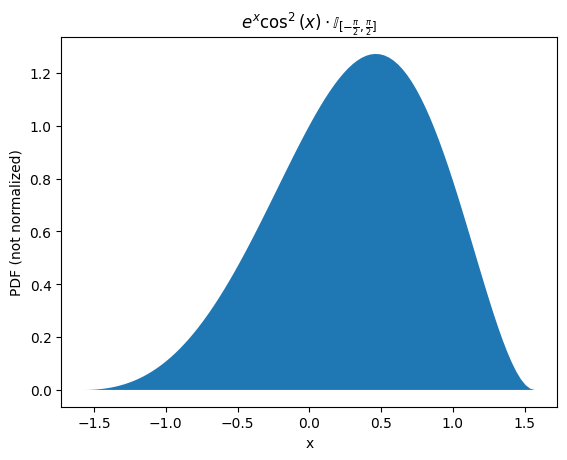

In [7]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

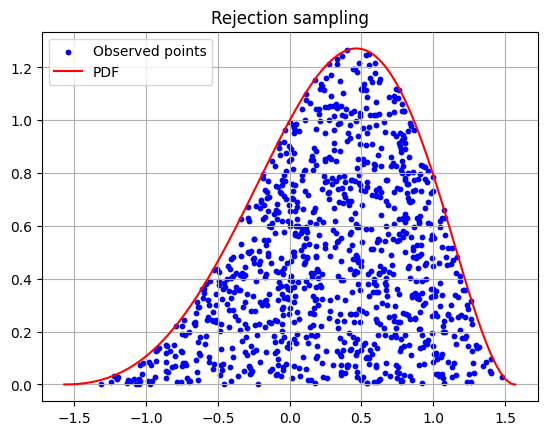

In [66]:
# Your code here
def pi(x):
    return np.exp(x) * np.cos(x) ** 2

def p(x):
    return 1 / np.pi

x_val = np.linspace(-np.pi/2, np.pi/2, 1000)
M = np.max(pi(x_val)) / p(x_val[0])

n = 1000
points_x = []
points_y = []
while len(points_x) < n:
    x = np.random.uniform(-np.pi/2, np.pi/2)
    y = np.random.uniform(0, M * p(x))
    if y <= pi(x):
        points_x.append(x)
        points_y.append(y)

points_x = np.array(points_x)
points_y = np.array(points_y)

plt.scatter(points_x, points_y, color='blue', label='Observed points', s=10)

density = pi(x_val)

plt.plot(x_val, density, 'r-', label='PDF')
plt.title('Rejection sampling')
plt.legend()
plt.grid(True)
plt.show()

## Coordinate transformation method

The accept-reject method may in some cases be inefficient and require too many sample points. An alternative is to try to find a coordinate transformation that converts a simple area (from which it is easy to sample, for example, a unit square) into the required area, but preserves the area ratio (why?).

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

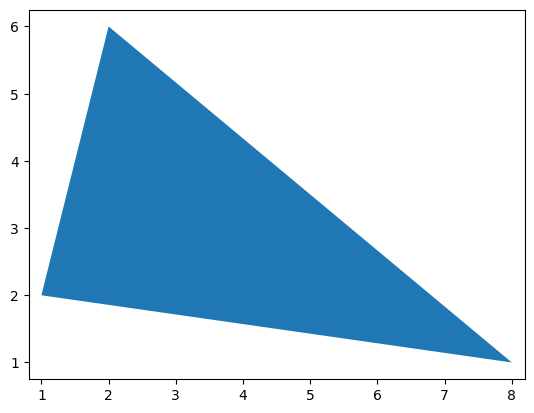

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

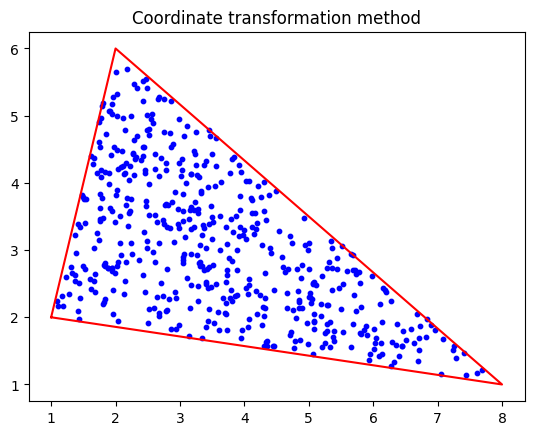

In [45]:
# Your code here
vertices = np.array([[1, 2], [2, 6], [8, 1]])
A, B, C = vertices

n = 500
points = []

for _ in range(n):
    u, v = np.random.rand(2)
    if u + v > 1:
        u, v = 1 - u, 1 - v

    P = A + u * (B - A) + v * (C - A)
    points.append(P)

points = np.array(points)

x = [1, 2, 8, 1]
y = [2, 6, 1, 2]
plt.plot(x, y, 'r-')

plt.scatter(points[:, 0], points[:, 1], color='blue', s=10)

plt.title('Coordinate transformation method')
plt.show()

В данном случае мы использовали барицентрические координаты, которые являются аффинно-инвариантными, поэтому отношение площадей также сохранится.

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

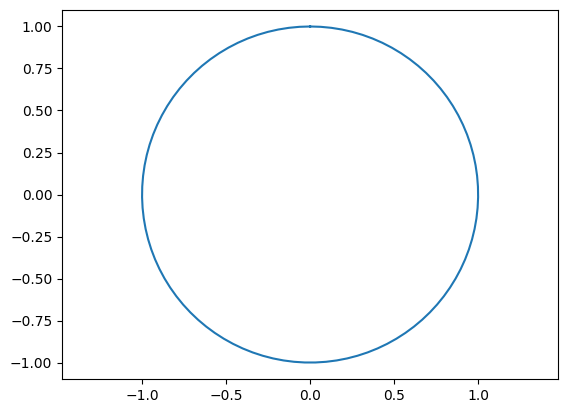

In [ ]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

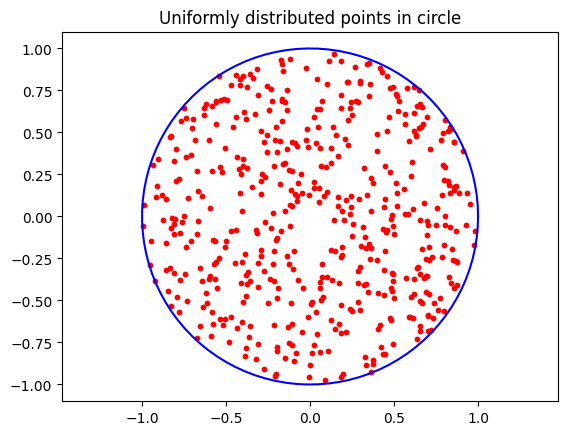

In [49]:
# Your code here
n = 500

r = np.sqrt(np.random.uniform(0, 1, n))
theta = np.random.uniform(0, 2 * np.pi, n)

x = r * np.cos(theta)
y = r * np.sin(theta)

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(t), np.sin(t), 'b-')

plt.scatter(x, y, color='r', s=10)

plt.title("Uniformly distributed points in circle")
plt.axis('equal')
plt.show()

При выборе радиуса я использовал корень, чтобы точки действительно были распределены равномерно в круге. Если этого не сделать, то получим больше точек ближе к центру окружности. Это происходит из-за того, что, если радиус выбирается с одинаковой вероятностью, то получим что на всех окружностях внутри круга будет приблизительно одинаковое число точек (в идеальном случае). Но тогда на окружностях меньшего радиуса столько же точек, сколько и на окружностях большего радиуса, то есть распределение в круге неравномерно.

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [53]:
import seaborn as sns

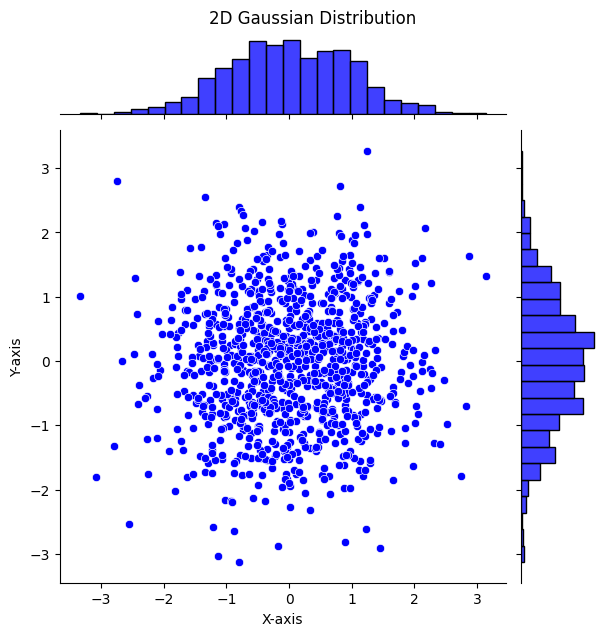

In [54]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

[4.17528479 7.30010272] [[19.42020018 -5.47882146]
 [-5.47882146 39.77096817]]


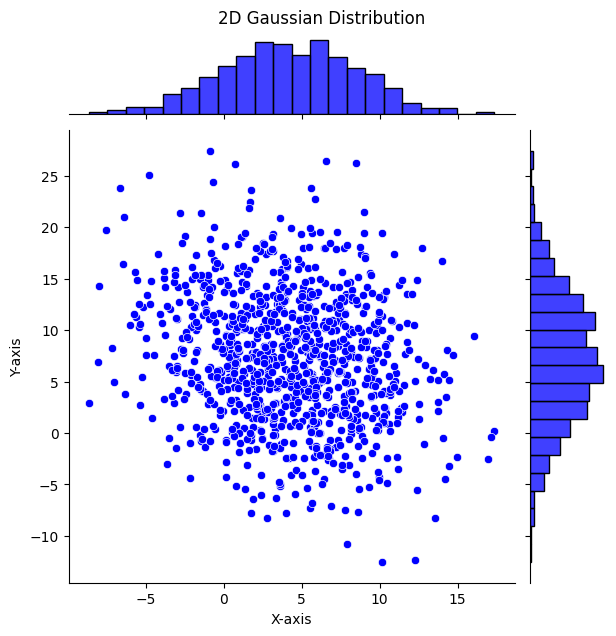

In [76]:
# Your code here
import seaborn as sns
from scipy.linalg import cholesky

n = 1000
Z = np.zeros((n, 2))
i = 0

while i < n:
  u1, u2 = np.random.uniform(-1, 1, 2)
  s = u1**2 + u2**2
  if s < 1:
    Z[i, 0] = u1 * np.sqrt(-2 * np.log(s) / s)
    Z[i, 1] = u2 * np.sqrt(-2 * np.log(s) / s)
    i += 1

mu = np.array([4, 7])
sigma = np.array([[20, -4], [-4, 40]])

L = cholesky(sigma)
X = mu + Z @ L.T
sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X, rowvar=False)

print(sample_mean, sample_cov)

x = X[:, 0]
y = X[:, 1]
joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()


### Problem 10*

Implement a method of generating a random partition of an n-element set into subsets. Use it to estimate the expected number of subsets in a random partition of a set of 100 elements.

Hint 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Hint 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [64]:
# Your code here
def random_partition(n):
    partition = []
    for i in range(1, n + 1):
        if len(partition) == 0:
            partition.append([i])
        else:
            choice = random.randint(0, len(partition))
            if choice == len(partition):
                partition.append([i])
            else:
                partition[choice].append(i)
    return partition

def estimate_subsets(n, samples=1000):
    sum = 0
    for _ in range(samples):
        partition = random_partition(n)
        sum += len(partition)
    return sum / samples

n = 100
expected_subsets = estimate_subsets(n)
print(expected_subsets)

13.379
